In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

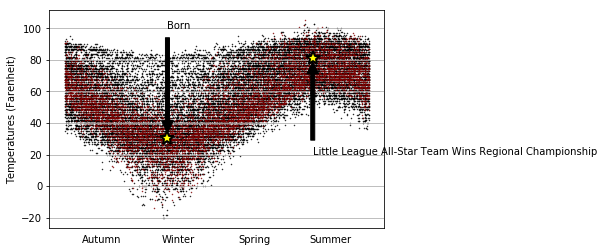

In [6]:
# A lifetime of temperatures
offset_day = pd.to_datetime('1975-09-21').dayofyear

Indiana = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Indiana.csv", index_col=1)
Indiana.index = pd.to_datetime(Indiana.index)
Indiana['DayofYear'] = Indiana.index.dayofyear
Indiana['DayofYear'] = np.where(Indiana['DayofYear']>= offset_day, Indiana['DayofYear']-offset_day+1, 366+Indiana['DayofYear']-offset_day)
plt.scatter(Indiana['DayofYear'], Indiana['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Indiana['DayofYear'], Indiana['TMIN'], c='black', linewidths=None, s=0.2)

Pittsburgh = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Pittsburgh.csv", index_col=1)
Pittsburgh.index = pd.to_datetime(Pittsburgh.index)
Pittsburgh['DayofYear'] = Pittsburgh.index.dayofyear
Pittsburgh['DayofYear'] = np.where(Pittsburgh['DayofYear']>= offset_day, Pittsburgh['DayofYear']-offset_day+1, 366+Pittsburgh['DayofYear']-offset_day)
plt.scatter(Pittsburgh['DayofYear'], Pittsburgh['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Pittsburgh['DayofYear'], Pittsburgh['TMIN'], c='black', linewidths=None, s=0.2)

Miami = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Miami.csv", index_col=1)
Miami.index = pd.to_datetime(Miami.index)
Miami['DayofYear'] = Miami.index.dayofyear
Miami['DayofYear'] = np.where(Miami['DayofYear']>= offset_day, Miami['DayofYear']-offset_day+1, 366+Miami['DayofYear']-offset_day)
plt.scatter(Miami['DayofYear'], Miami['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Miami['DayofYear'], Miami['TMIN'], c='black', linewidths=None, s=0.2)

Washington = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Washington.csv", index_col=1)
Washington.index = pd.to_datetime(Washington.index)
Washington['DayofYear'] = Washington.index.dayofyear
Washington['DayofYear'] = np.where(Washington['DayofYear']>= offset_day, Washington['DayofYear']-offset_day+1, 366+Washington['DayofYear']-offset_day)
plt.scatter(Washington['DayofYear'], Washington['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Washington['DayofYear'], Washington['TMIN'], c='black', linewidths=None, s=0.2)

Chicago = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Chicago.csv", index_col=1)
Chicago.index = pd.to_datetime(Chicago.index)
Chicago['DayofYear'] = Chicago.index.dayofyear
Chicago['DayofYear'] = np.where(Chicago['DayofYear']>= offset_day, Chicago['DayofYear']-offset_day+1, 366+Chicago['DayofYear']-offset_day)
plt.scatter(Chicago['DayofYear'], Chicago['TMAX'], c='maroon', linewidths=None, s=0.2)
plt.scatter(Chicago['DayofYear'], Chicago['TMIN'], c='maroon', linewidths=None, s=0.2)

n = 365/8
x = [n, 3*n, 5*n, 7*n]
labels = ['Autumn', 'Winter', 'Spring', 'Summer']
plt.xticks(x, labels)
plt.tick_params(axis='x', which='both',bottom='off',top='off')

events = 366+np.array([pd.to_datetime('1975-01-22').dayofyear, pd.to_datetime('1988-07-14').dayofyear])-offset_day
tavg_born = (Indiana.loc['1975-01-22','TMAX']+Indiana.loc['1975-01-22','TMIN'])/2
tavg_game = (Pittsburgh.loc['1988-07-14','TMAX']+Pittsburgh.loc['1988-07-14','TMIN'])/2              
plt.plot(events, [tavg_born,tavg_game], color='yellow', mec='black', mew=2, marker='*', ms=15, lw=0)           
plt.annotate('Born', xy=(events[0],tavg_born), xytext=(events[0],100), arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('Little League All-Star Team Wins Regional Championship', xy=(events[1],tavg_game), xytext=(events[1],20), arrowprops=dict(facecolor='black',shrink=0.05))
              
plt.ylabel('Temperatures (Farenheit)')
plt.gca().yaxis.grid(True)
plt.savefig('images/lifetimeweather.png',bbox_inches='tight')
plt.show()


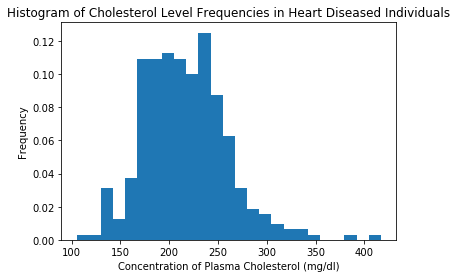

Mid-point of bin with max y: 229.8


In [7]:
# 3D Histogram

lipids = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/lipids.csv",header=4)
lipids = lipids[lipids['diseased']==1]

weights = (1/lipids['chol'].shape[0])*np.ones_like(lipids['chol'])
y, x, _ = plt.hist(lipids['chol'],weights=weights,bins=25)
plt.xlabel('Concentration of Plasma Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Level Frequencies in Heart Diseased Individuals')
plt.savefig('images/2dhistogram.png',bbox_inches='tight')
plt.show()
max_y_ind = np.argmax(np.array(y))
print('Mid-point of bin with max y:', (x[max_y_ind]+x[max_y_ind])/2)

As seen in the histogram above and the calculated value, the midpoint of the bin with the highest frequency is 229.8.

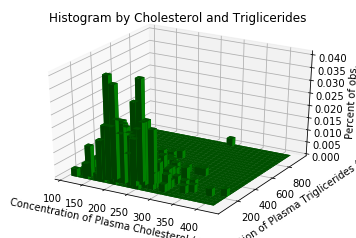

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(25)
hist, xedges, yedges = np.histogram2d(lipids['chol'], lipids['trig'], bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('Concentration of Plasma Cholesterol (mg/dl)')
ax.set_ylabel('Concentration of Plasma Triglicerides (mg/dl)')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram by Cholesterol and Triglicerides')
plt.savefig('images/3dhistogram.png',bbox_inches='tight')
plt.show()

When looking at the 3D histogram, it can be seen that there are multiple bins in the plasma cholesterol with a similar amount of plasma triglicerides that are high percentages of the diseased observations. Thus, I would say the most at-risk group is those with cholesterol from 250 to 250 and plasma triglicerides from 200 to 400. 

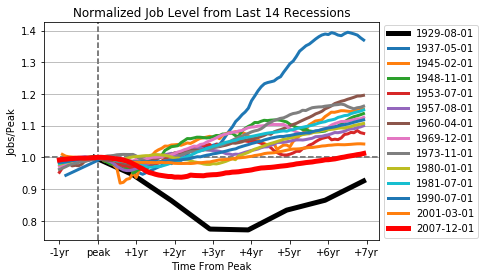

In [9]:
# Comparing Segments of Time Series

payems = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/payems.csv",header=5)
payems['payems'] = payems['payems']*1000
payems['date'] = pd.to_datetime(payems['date'])
payems.iloc[:346,0] = payems.iloc[:346,0] - pd.DateOffset(years=100)
payems = payems.set_index('date')

# Buckets last one year before and seven years after the recession
recessions = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/recessions.csv",squeeze=True,header=None,names=['Peak Date'])
recessions = pd.to_datetime(recessions)

plt.axvline(x=0,ls='--',color='gray',lw=2)
plt.axhline(y=1,ls='--',color='gray',lw=2)

for i in range(14):
    if i == 0:
        date = '1929-07-01'
    elif i ==1:
        date = '1937-07-01'
    else:
        date = str(recessions[i].date())
    peak_job = payems.loc[date,'payems']
    payems['rece'+str(i+1)] = (payems.index-recessions[i])/np.timedelta64(1, 'D')
   
    x = payems.loc[(payems['rece'+str(i+1)]>=-365) & (payems['rece'+str(i+1)]<=7*365), 'rece'+str(i+1)]
    y = payems.loc[(payems['rece'+str(i+1)]>=-365) & (payems['rece'+str(i+1)]<=7*365), 'payems']/peak_job
    lb = str(recessions[i].date())
    if i == 0 or i == 13:
        if i == 0:
            col = 'black'
        else:
            col = 'red'
        plt.plot(x,y,marker=None,lw=5,color=col,label=lb)
    else:
        plt.plot(x,y,marker=None,lw=3,label=lb)
        
x = [-365,0,365,2*365,3*365,4*365,5*365,6*365,7*365]
labels = ['-1yr', 'peak', '+1yr', '+2yr', '+3yr', '+4yr', '+5yr', '+6yr', '+7yr']
plt.xticks(x, labels)

plt.ylabel('Jobs/Peak')
plt.xlabel('Time From Peak')
plt.title("Normalized Job Level from Last 14 Recessions")
plt.gca().yaxis.grid(True)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.savefig('images/jobpeak.png',bbox_inches='tight')
plt.show()


From the plot, besides the Great Depression, the depression of 1945 was briefly worse in terms of jobs than the Great Recession in the first year, but quickly recovered. The Great Recession has been the worst for jobs since the Great Depression, which has been the worst recession in the United States.